## DATASET - Alquileres AIRBNB en Europa

**Descripción:**
Departamentos en alquiler en AIRBNB en Europa, en función de tipo de las características del local.

**Variables de interés:**
Ciudad, Precio, Tipo, Capacidad, Distancias a puntos de interés, Distancias al metro

**Fuente:** 
https://www.kaggle.com/datasets/dipeshkhemani/airbnb-cleaned-europe-dataset

**Objetivo:**
Intentaremos buscar una relación entre el precio y las demás variables, en particular 'distancia al centro' y 'capacidad de personas'

### CARGA DE DATASET

In [40]:
import numpy as np
import pandas as pd
import requests
from io import StringIO

url = 'https://raw.githubusercontent.com/tekluis/CoderHouse/main/Aemf.csv'
response = requests.get(url).text
csv_data = StringIO(response)

df = pd.read_csv(csv_data)
print("Cantidad de filas:", df.shape[0])
print("Cantidad de columnas:", df.shape[1])
print("Primeras 5 filas del dataframe")
df.head()

Cantidad de filas: 41714
Cantidad de columnas: 19
Primeras 5 filas del dataframe


,City,Price,Day,Room Type,Shared Room,Private Room,Person Capacity,Superhost,Multiple Rooms,Business,Cleanliness Rating,Guest Satisfaction,Bedrooms,City Center (km),Metro Distance (km),Attraction Index,Normalised Attraction Index,Restraunt Index,Normalised Restraunt Index
0,Amsterdam,194.033698,Weekday,Private room,False,True,2,False,1,0,10,93,1,5.022964,2.539380,78.690379,4.166708,98.253896,6.846473
1,Amsterdam,344.245776,Weekday,Private room,False,True,4,False,0,0,8,85,1,0.488389,0.239404,631.176378,33.421209,837.280757,58.342928
2,Amsterdam,264.101422,Weekday,Private room,False,True,2,False,0,1,9,87,1,5.748312,3.651621,75.275877,3.985908,95.386955,6.646700
3,Amsterdam,433.529398,Weekday,Private room,False,True,4,False,0,1,9,90,2,0.384862,0.439876,493.272534,26.119108,875.033098,60.973565
4,Amsterdam,485.552926,Weekday,Private room,False,True,2,True,0,0,10,98,1,0.544738,0.318693,552.830324,29.272733,815.305740,56.811677


### GRAFICOS CON MATPLOTLIB

Como primer gráfico haremos uno de puntos para tratar de obtener una relación entre el precio de alquiler y la distancia al centro de la ciudad.

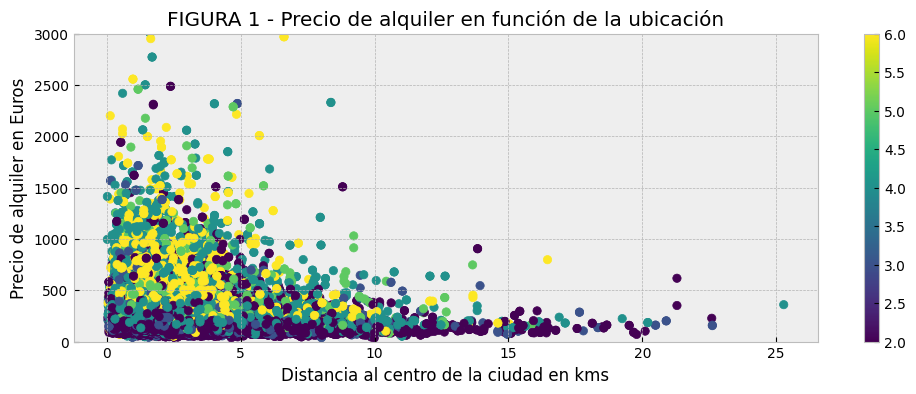

In [3]:
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('bmh')

x=df['City Center (km)']
y=df['Price']

fig, ax = plt.subplots(figsize=(12, 4))
mapeo_colores = ax.scatter(x, y, c=df['Person Capacity'])
fig.colorbar(mapeo_colores)

ax.set_ylim(0, 3000)
ax.set_title('FIGURA 1 - Precio de alquiler en función de la ubicación')
ax.set_xlabel('Distancia al centro de la ciudad en kms')
ax.set_ylabel('Precio de alquiler en Euros')

plt.show()



Como puede verse en el gráfico anterior, hay una relación inversa entre el precio y la distancia al centro. 
Los locales más cercanos al centro tienen precios más elevados (cerca de 3.000 euros), mientras que los más alejados van disminuyendo el precio (los que están a 10kms valen abajo de 1.000 euros y los que están a 20kms valen abajo de 500 euros)

Por otra parte, puede verse que los locales con mayor capacidad tienen mayor precio que los de menor capacidad. 
Los que albergan entre 5 y 6 personas están de color verde y amarillo, mientras que los que albergan entre 2 y 4 personas están de color violeta y morado.

Para poder apreciar mejor la relación entre precio y capacidad haremos un gráfico de barras.

Text(0.5, 0, 'Capacidad de personas del local')

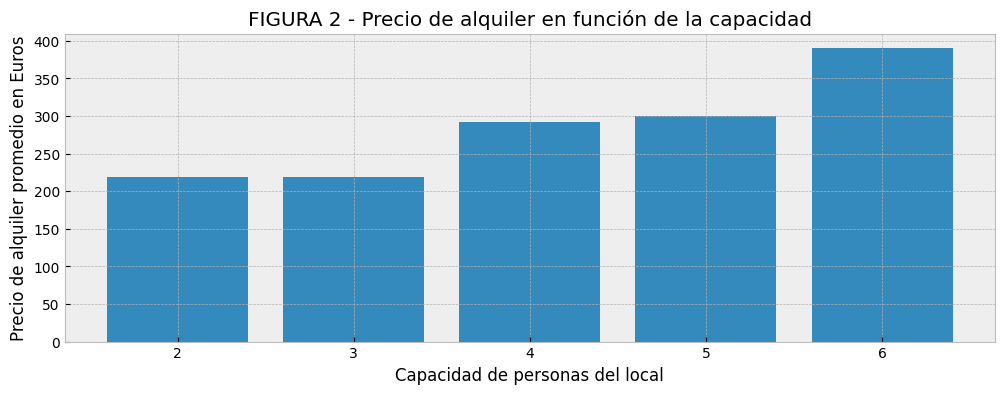

In [4]:
fig, ax = plt.subplots(figsize=(12,4))
precio_por_capacidad = df.groupby('Person Capacity')['Price'].mean()

ax.bar(precio_por_capacidad.index, precio_por_capacidad)
ax.set_title('FIGURA 2 - Precio de alquiler en función de la capacidad')
ax.set_ylabel('Precio de alquiler promedio en Euros')
ax.set_xlabel('Capacidad de personas del local')

En el gráfico anterior puede verse claramente que a medida que aumenta la capacidad del local, el valor promedio de alquiler aumenta. 
Los locales de capacidad para 2 y 3 personas tienen un valor promedio menor a 250 euros. 
Los locales de capcidad para 4 y 5 personas tienen un valor promedio de 300 euros.
Mientras que los locales de 6 personas alcanzan un promedio cercano a los 400 euros.

Para entender mejor la relación entre precio y capacidad del local, repetiremos el gráfico anterior pero esta vez usaremos un gráfico de caja.

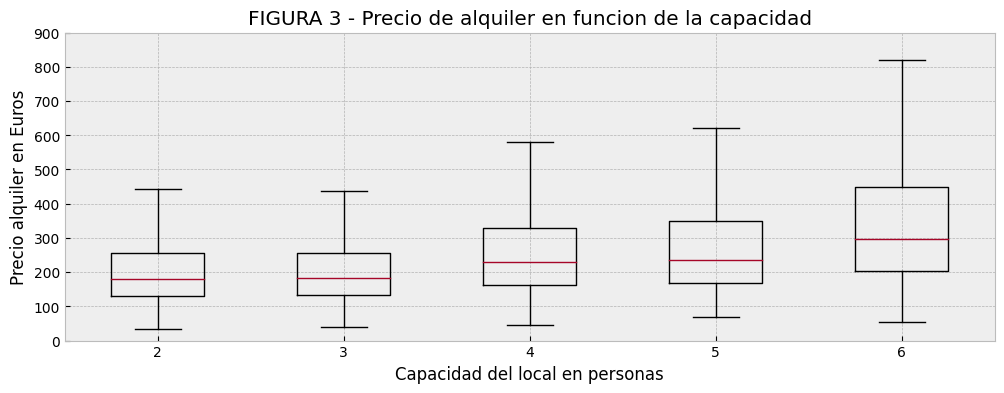

In [5]:

fig, ax = plt.subplots(figsize=(12,4))

column_x = 'Person Capacity'
column_y = 'Price'

x_categories = [2,3,4,5,6]
x_positions = np.arange(len(x_categories))

ax.boxplot([df[df[column_x] == x][column_y] for x in x_categories], positions=x_positions, showfliers=False)

ax.set_xticks(x_positions)  # Posiciones de los ticks del eje x
ax.set_xticklabels(x_categories)  # Etiquetas del eje x
ax.set_ylabel('Precio alquiler en Euros')  # Etiqueta del eje y
ax.set_xlabel('Capacidad del local en personas')  # Etiqueta del eje x
ax.set_title('FIGURA 3 - Precio de alquiler en funcion de la capacidad')  # Título del gráfico
ax.set_ylim(0, 900)

# Mostrar el gráfico
plt.show()


Podemos observar en el gráfico anterior que no sólo el promedio de los locales sube en función de su capacidad, también aumentan la mediana, y todos los cuartiles a medida que aumenta la capacidad del local medido en personas.

Otro análisis interesante es conocer la distribución de los locales en función de la distancia al centro de la ciudad, para ello haremos un histograma.

Text(0.5, 1.0, 'FIGURA 4 - Distribuición de locales en función de distancia al centro')

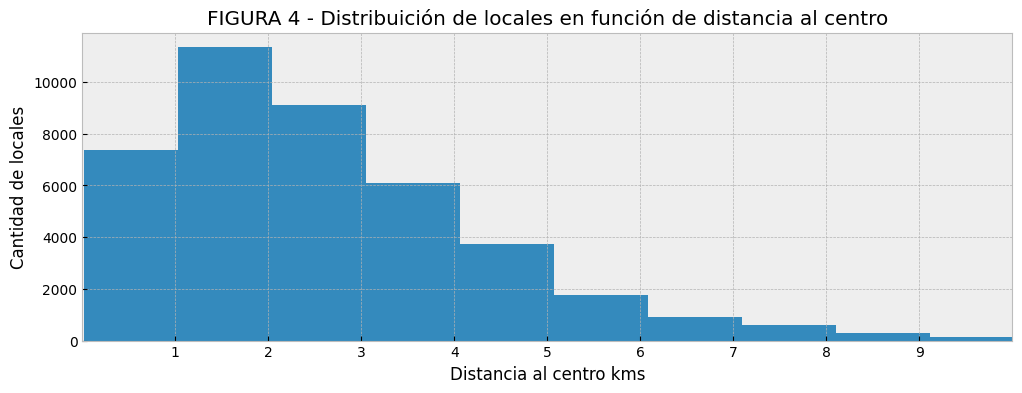

In [41]:
fig, ax = plt.subplots(figsize=(12,4))

ax.hist(df['City Center (km)'], bins=25)
ax.set_xlim(0, 10)
ax.set_xticks([1,2,3,4,5,6,7,8,9])
ax.set_ylabel('Cantidad de locales')  # Etiqueta del eje y
ax.set_xlabel('Distancia al centro kms')  # Etiqueta del eje x
ax.set_title('FIGURA 4 - Distribuición de locales en función de distancia al centro')  # Título del gráfico



Es interesante ver que los locales que se encuentran a menos de 1km del centro (primera columna del gráfico) no son los de mayor cantidad.
La mayor concentración de locales está en la segunda columna (a una distancia del centro de la ciudad de entre 1km y 2km), luego la cantidad de locales va disminuyendo a medida que nos vamos alejando del centro.


### GRAFICOS CON SEABORN

Esta vez analizaremos la relación entre precio de los locales y distancia al centro de la ciudad, pero separándolos por ciudad en la que se encuentran.

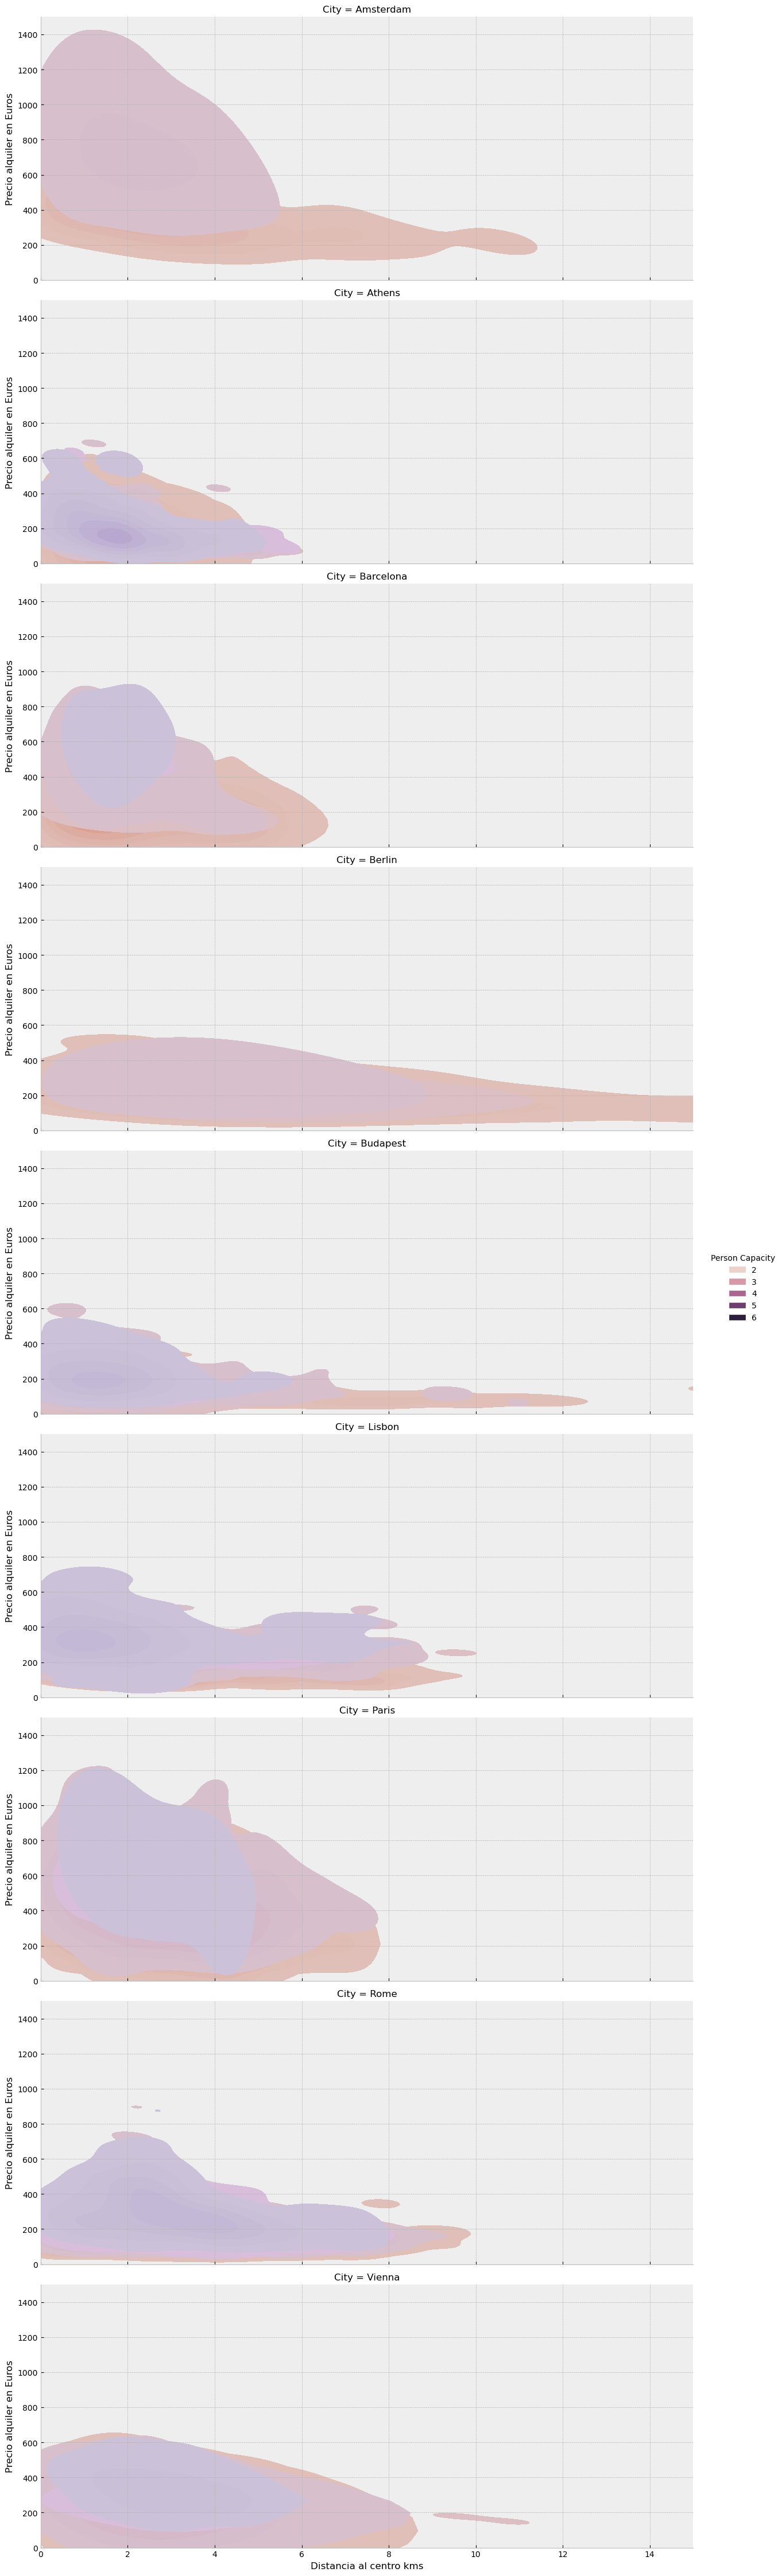

In [30]:
import seaborn as sns

ax = sns.displot(data=df, y="Price", x="City Center (km)", kind='kde', hue="Person Capacity", row='City', fill=True, aspect=2.5)
ax.set(xlabel='Distancia al centro kms',ylabel='Precio alquiler en Euros', ylim=(0,1500),xlim=(0,15))

plt.show()

Según los gráficos anteriores podemos confirmar que hay una relación inversa entre la distancia al centro de la ciudad y el precio del alquiler. Si bien, en algunas ciudades la pendientes es más pronunciada (como en Amsterdam y París) y en otras ciudades la pendiente es más suave (como en Berlín y Budapest) en todas se repite la tendencia de que a medida que nos alejamos del centro de la ciudad, los precios bajan.

Siguiendo con la comparación entre ciudades, compararemos los precios entre distintas ciudades. Para ello haremos un gráfico de caja.

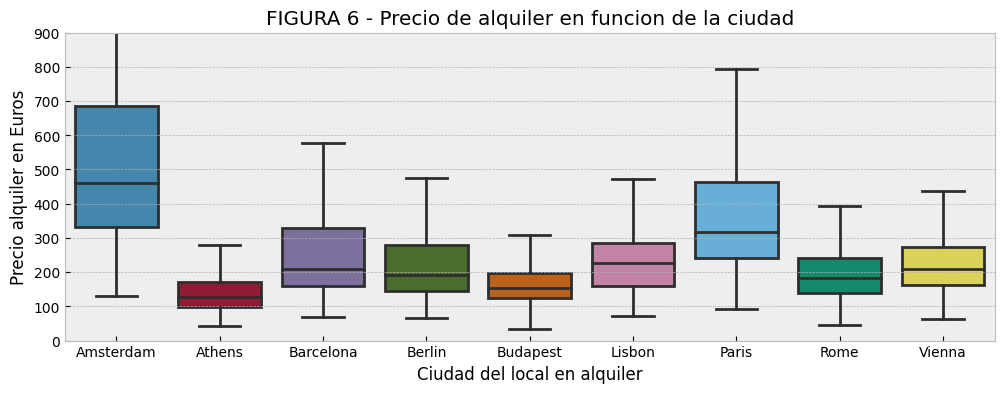

In [42]:
fig, ax = plt.subplots(figsize=(12,4))

ax=sns.boxplot(data=df,x='City', y='Price', showfliers=False)
ax.set(title='FIGURA 6 - Precio de alquiler en funcion de la ciudad', xlabel='Ciudad del local en alquiler',
       ylabel='Precio alquiler en Euros', ylim=(0,900))

plt.show()

Podemos concluir, que Amsterdam es la ciudad más costosa para alquilar, mientras que Atenas y Budapest son las más económicas.

Ahora analizaremos qué capacidad de local es la más común mediante un gráfico de frecuencia.

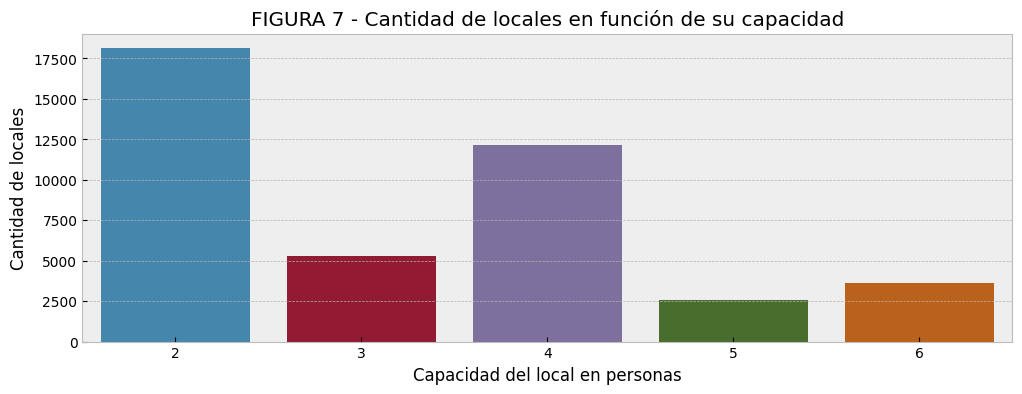

In [43]:
fig, ax = plt.subplots(figsize=(12,4))

ax=sns.countplot(data=df, x='Person Capacity')
ax.set(xlabel='Capacidad del local en personas',ylabel='Cantidad de locales',
       title='FIGURA 7 - Cantidad de locales en función de su capacidad')

plt.show()


Según el gráfico vemos que los locales más comunes son los de capacidad para dos personas (habitaciones dobles), seguidos por los de capacidad para 4 personas (habitaciones cuádruples). Luego siguen, en mucha menor cantidad, los de 3, 6 y 5 personas.

Por último, analizaremos si existe alguna relación entre la capacidad de los locales y su distancia al centro de la ciudad.

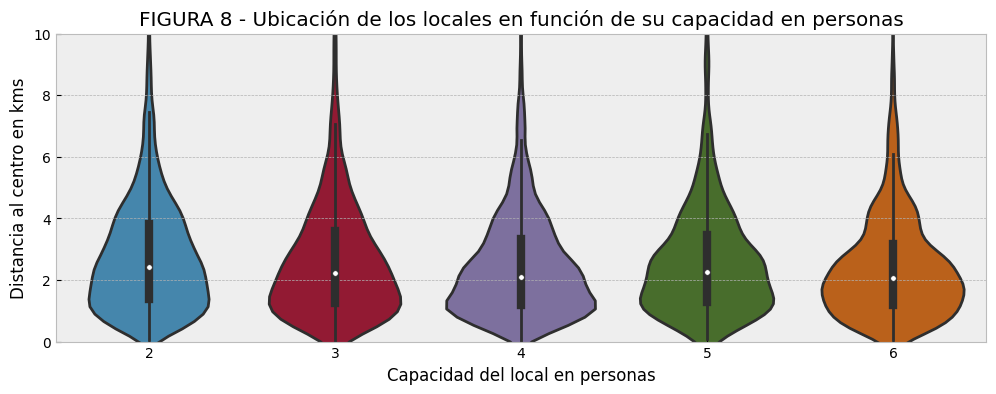

In [44]:
fig, ax = plt.subplots(figsize=(12,4))

ax=sns.violinplot(y="City Center (km)", x='Person Capacity', data=df)
ax.set(xlabel='Capacidad del local en personas',ylabel='Distancia al centro en kms',
       title='FIGURA 8 - Ubicación de los locales en función de su capacidad en personas',ylim=(0,10))

plt.show()


Podemos observar que no hay una relación clara entre el tamaño de los locales y su ubicación. 

### CONCLUSIONES

- Los precios de alquiler de los locales están inversamente relacionados a la distancia al centro de la ciudad (FIGURA 1 Y FIGURA 5).
- El precio del alquiler aumenta entre 50% (capacidad para 3 y 4 personas) y 100% (capacidad para 5 y 6 personas) a medida que aumenta la capacidad (FIGURA 2 Y FIGURA 3).
- La mayor cantidad de locales se encuentran ubicados a una distancia de entre 1km y 3km del centro de la ciudad (FIGURA 4)
- El precio varía significativamente en función de la ciudad en la que se encuentra el local (FIGURA 6).
- Los alquileres más ofrecidos son los de capacidad para 2 y para 4 personas, en ese orden (FIGURA 7).
- No existe una relación clara entre la distancia al centro de un local y su capacidad en personas (FIGURA 8).